In [1]:
import pandas as pd
import numpy as np

In [2]:
drinks = pd.read_csv('WHO_data_alc.csv', low_memory=False, header=0)

In [18]:
drinks.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

Location = Country

Period = year

Dim1 = Alcohol cateogory

FactValueNumeric = Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

In [5]:
df = drinks[['Location', 'Period', 'Dim1', 'FactValueNumeric', 'FactValueNumericLow','FactValueNumericHigh']]
df

,Location,Period,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
0,Afghanistan,2019,Beer,0.00,0.0,0.0
1,Afghanistan,2019,Other alcoholic beverages,0.00,0.0,0.0
2,Afghanistan,2019,Wine,0.00,0.0,0.0
3,Algeria,2019,Other alcoholic beverages,0.00,0.0,0.0
4,Andorra,2019,Other alcoholic beverages,0.00,0.0,0.0
...,...,...,...,...,...,...
47784,United States of America,1960,Spirits,3.26,NaN,NaN
47785,United States of America,1960,Beer,3.75,NaN,NaN
47786,Austria,1960,Beer,4.70,NaN,NaN
47787,United States of America,1960,All types,7.83,NaN,NaN


In [10]:
all_types = df[df['Dim1'] == 'All types']
beer = df[df['Dim1'] == 'Beer']
wine = df[df['Dim1'] == 'Wine']
other = df[df['Dim1'] == 'Other alcoholic beverages']

In [16]:
# no. of entries per country

df['Location'].value_counts()

Mali                                295
Malawi                              295
United Republic of Tanzania         295
Democratic Republic of the Congo    295
Sao Tome and Principe               295
                                   ... 
Andorra                             100
Maldives                            100
Cook Islands                         90
Montenegro                           70
Serbia                               70
Name: Location, Length: 189, dtype: int64

In [17]:
# no. of entries per year

df['Period'].value_counts()

2015    940
2012    940
2010    940
2011    940
2018    940
2019    940
2017    940
2013    940
2016    940
2014    940
2009    935
2008    935
2007    935
2006    935
2005    925
2001    915
2002    915
2003    915
2004    915
2000    915
1999    897
1995    895
1993    895
1994    895
1997    894
1996    894
1998    893
1992    887
1991    869
1990    865
1988    779
1987    775
1989    774
1986    770
1985    768
1984    763
1983    762
1982    760
1981    755
1980    750
1974    674
1975    674
1973    674
1970    670
1979    670
1971    670
1977    670
1972    669
1976    666
1966    666
1969    666
1968    666
1967    666
1978    666
1965    661
1963    661
1964    661
1962    632
1961    619
1960      8
Name: Period, dtype: int64

In [18]:
gdp_pc = pd.read_csv('gdp_per_capita.csv')

In [19]:
gdp_pc

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4346.637931,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.536472,1607.152173,1674.002572,1601.830063,1152.720966,964.264811,758.145242,NaN,NaN,NaN
263,South Africa,ZAF,443.009920,454.962013,473.011405,511.497364,548.996058,584.704163,621.220543,675.135345,...,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,NaN
264,Zambia,ZMB,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,343.373670,360.201239,...,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436,NaN


In [70]:
# example plot of gpd vs alcohol consumption

usa_gdp = gdp_pc[gdp_pc['Country Name'] == 'United States'].T.drop(['Country Name', 'Code', 'Unnamed: 65'])
usa_gdp['Year'] = usa_gdp.index
usa_gdp.columns = ['GDP', 'Year']
usa_gdp = usa_gdp.reset_index()
usa_gdp = usa_gdp.drop(['index'], axis=1)
usa_gdp

,GDP,Year
0,3007.12,1960
1,3066.56,1961
2,3243.84,1962
3,3374.52,1963
4,3573.94,1964
...,...,...
56,58021.4,2016
57,60109.7,2017
58,63064.4,2018
59,65279.5,2019


In [74]:
consumption_usa = all_types[all_types['Location'] == 'United States of America'][['Period', 'FactValueNumeric']].reset_index().drop(['index'], axis=1)
consumption_usa.columns = ['Year', 'alc_cons_litre']
consumption_usa

,Year,alc_cons_litre
0,2019,8.93
1,2018,8.93
2,2017,8.89
3,2016,8.89
4,2015,8.78
5,2014,8.78
6,2013,8.81
7,2012,8.85
8,2011,8.66
9,2010,8.56


In [80]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [85]:
x1 = consumption_usa['alc_cons_litre'].values
scaler = preprocessing.MinMaxScaler()
x1_scaled = scaler.fit_transform(x1)

x1_scaled

ValueError: Expected 2D array, got 1D array instead:
array=[ 8.93  8.93  8.89  8.89  8.78  8.78  8.81  8.85  8.66  8.56  8.67  8.74
  8.74  8.63  8.55  8.48  8.4   8.33  8.25  8.21  8.21  8.1   8.1   8.18
  8.14  8.25  8.4   8.71  8.71  9.24  9.16  9.39  9.61  9.73  9.88 10.18
 10.18 10.3  10.45 10.45 10.41 10.26  9.99 10.18 10.18 10.11  9.88  9.69
  9.77  9.54  9.5   9.27  8.97  8.78  8.59  8.44  8.14  7.99  7.8   7.83].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

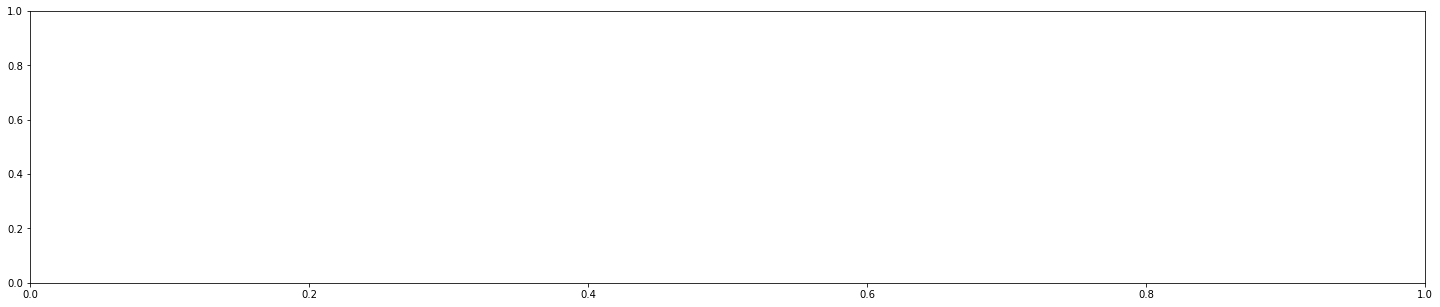

In [81]:
fig, ax = plt.subplots(1,1,figsize=(25,5))

# usa_gdp.plot(kind='line', x='Year', ax=ax)